In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Reading in the file
df = pd.read_csv('/content/mhs Data for F7.csv')

In [ ]:
# Printing the Data to look at the columns names and type of data
print(df)

    Age  SystolicBP  DiastolicBP    BS  BodyTemp HeartRate  RiskLevel
0    25       130.0           80  15.0      98.0        86  high risk
1    35       140.0           90  13.0      98.0   Seventy  high risk
2    29        90.0           70   8.0     100.0        80  high risk
3    30       140.0           85   7.0      98.0        70  high risk
4    35       120.0           60   6.1      98.0        76   low risk
..   ..         ...          ...   ...       ...       ...        ...
524  32       120.0           90   7.5      98.0        70   low risk
525  42       120.0           80   7.5      98.0        70   low risk
526  42        90.0           60   7.5      98.0        76   low risk
527  19       120.0           80   7.0      98.0        70   low risk
528  15        78.0           49   7.5      98.0        77   low risk

[529 rows x 7 columns]


In [ ]:
#Getting more info about the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          525 non-null    object 
 1   SystolicBP   526 non-null    float64
 2   DiastolicBP  529 non-null    int64  
 3   BS           529 non-null    float64
 4   BodyTemp     525 non-null    float64
 5   HeartRate    529 non-null    object 
 6   RiskLevel    529 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 29.1+ KB
None


In [ ]:
# Findinf the null values in the columns
null_counts = df.isnull().sum()

In [ ]:
# Printing the number of Null values and in which columns
print(null_counts)

Age            4
SystolicBP     3
DiastolicBP    0
BS             0
BodyTemp       4
HeartRate      0
RiskLevel      0
dtype: int64


In [ ]:
#Printing the whole Dataframe to look at the null values to come up with a strategy for replacing the null values
pd.set_option('display.max_rows', None)
print(df)

        Age  SystolicBP  DiastolicBP     BS  BodyTemp HeartRate  RiskLevel
0        25       130.0           80  15.00      98.0        86  high risk
1        35       140.0           90  13.00      98.0   Seventy  high risk
2        29        90.0           70   8.00     100.0        80  high risk
3        30       140.0           85   7.00      98.0        70  high risk
4        35       120.0           60   6.10      98.0        76   low risk
5    Twenty       140.0           80   7.01      98.0        70  high risk
6        23       130.0           70   7.01      98.0        78   mid risk
7        35        85.0           60  11.00     102.0        86  high risk
8        32       120.0           90   6.90      98.0        70   mid risk
9        42       130.0           80  18.00       NaN        70  high risk
10       23        90.0           60   7.01       NaN        76   low risk
11       19       120.0           80   7.00       NaN        70   mid risk
12       25       110.0  

In [ ]:
# I noticed some of the values are in string format so I will need to turn them into numeric
df['Age'] = df['Age'].replace('Twenty', 20)
df['HeartRate'] = df['HeartRate'].replace('Seventy', 70)

#Printing the first 10 rows to see if the values have been replaced
df.head(10)

,Age,SystolicBP,DiastolicBP,BodyTemp,HeartRate,RiskLevel,Adjusted_BS
0,25.0,130.0,80,98.0,86,high risk,12.00
1,35.0,140.0,90,98.0,70,high risk,10.00
2,29.0,90.0,70,100.0,80,high risk,5.00
3,30.0,140.0,85,98.0,70,high risk,4.00
4,35.0,120.0,60,98.0,76,low risk,3.10
5,20.0,140.0,80,98.0,70,high risk,4.01
6,23.0,130.0,70,98.0,78,mid risk,4.01
7,35.0,85.0,60,102.0,86,high risk,8.00
8,32.0,120.0,90,98.0,70,mid risk,3.90
9,42.0,130.0,80,98.6,70,high risk,15.00


In [ ]:
# Calculate the means rounded to one decimal place for each column
means = df.mean().round(1)
print(means)

Age             30.9
SystolicBP     113.4
DiastolicBP     77.4
BodyTemp        98.6
HeartRate       74.4
Adjusted_BS      5.7
dtype: float64


<ipython-input-52-735189cc80ad>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = df.mean().round(1)


In [ ]:
#Some Columns did not get a mean calculation.
#Converting the missing columns to numeric values
#Convert 'Age' and 'HeartRate' and 'BodyTemp' columns to numeric
df['Age'] = pd.to_numeric(df['Age'])
df['HeartRate'] = pd.to_numeric(df['HeartRate'])
df['BodyTemp'] = pd.to_numeric(df['BodyTemp'])



In [ ]:
# Running this calculation again for the means of the columns rounded to one decimal place for each column
means = df.mean().round(1)
print(means)

Age             30.9
SystolicBP     113.4
DiastolicBP     77.4
BodyTemp        98.6
HeartRate       74.4
Adjusted_BS      5.7
dtype: float64


<ipython-input-63-7733ae63deeb>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = df.mean().round(1)


In [ ]:
#Replacing the null values with the means
df = df.fillna(means)

In [ ]:
#Checking if the null values have been replaced
null_counts = df.isnull().sum()
print(null_counts)

Age            0
SystolicBP     0
DiastolicBP    0
BodyTemp       0
HeartRate      0
RiskLevel      0
Adjusted_BS    0
dtype: int64


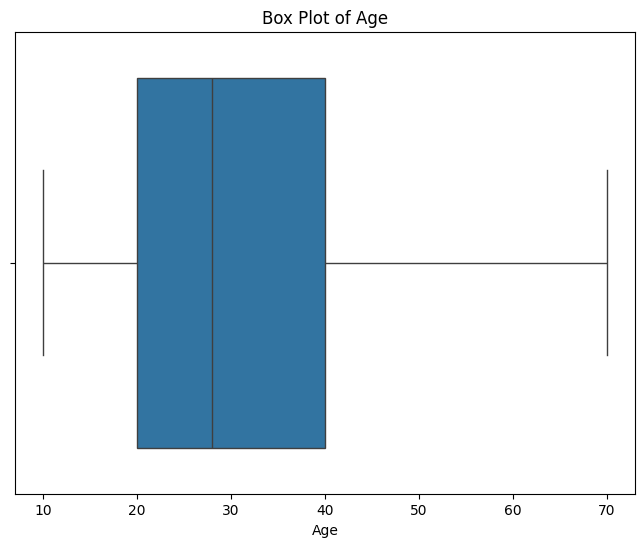

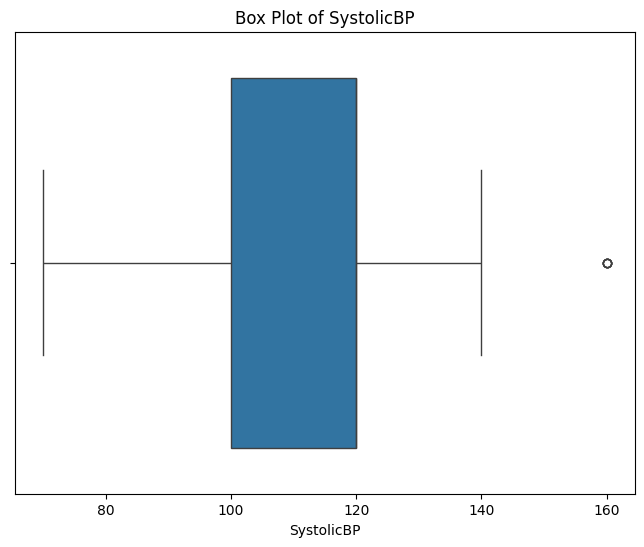

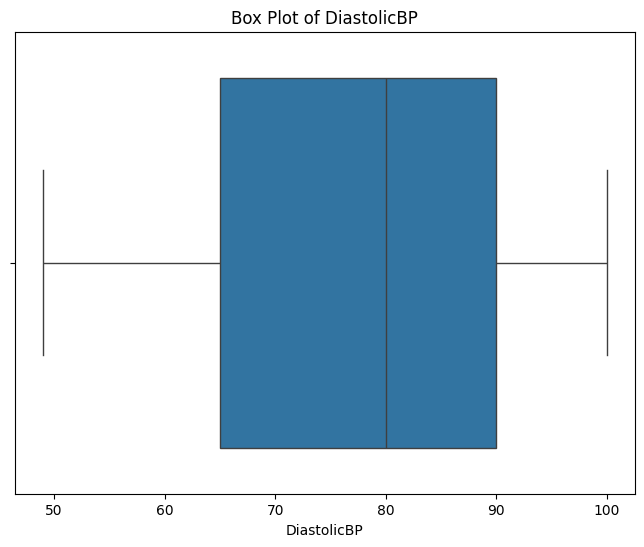

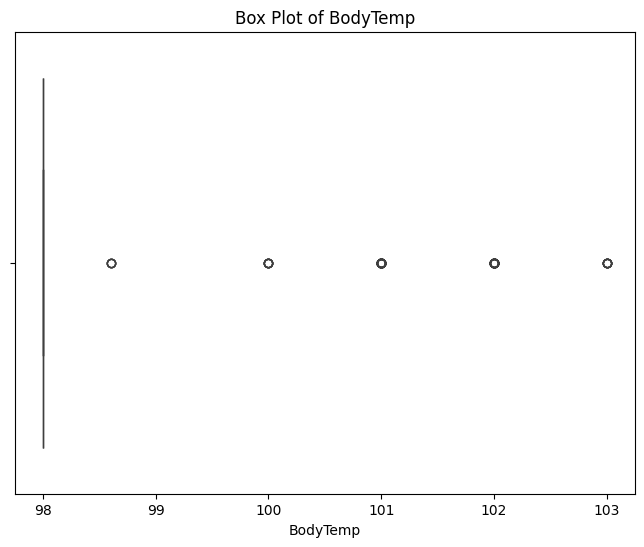

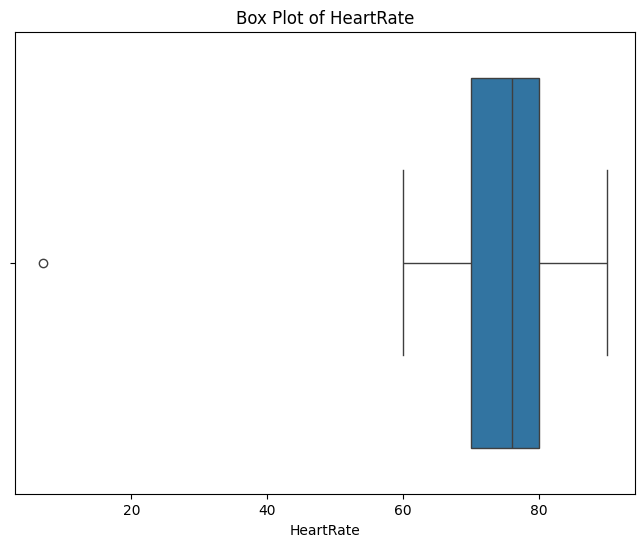

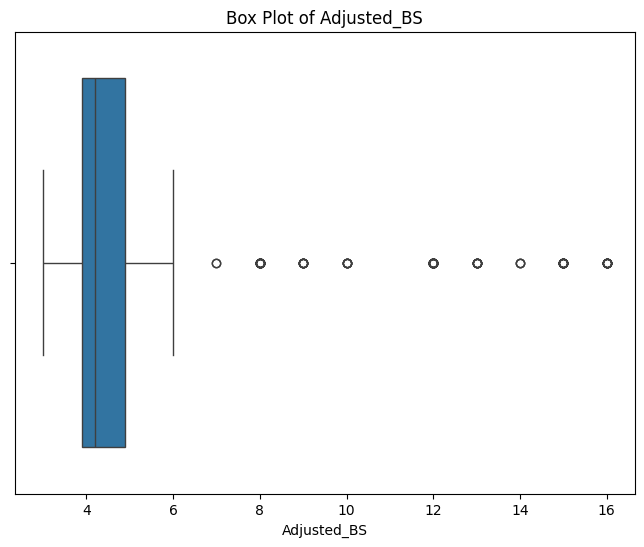

In [ ]:

# Selecting numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Creating boxplots for each numeric column
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

Looking at the BoxPlots the columns 'Age' and 'DiastolicBP' have significant outliers. The outliers in the 'Age' column of giving Birth, the lowers was 10 and the highest was 70. I decided to keep these rows as although it was rare it was medically still possible with intervention.

The outlier in the 'DiastolicBP' column was 1000, as the other associated values were considered 'Normal' I assumed 1000 was a typo and changed this 1000.

In [ ]:
# Replacing the outlier in 'DiastolicBP' with a new value
df['DiastolicBP'] = df['DiastolicBP'].replace(1000, 100)

In [ ]:
#Printing the first 20 rows to see if the value has been replaced
df.head(20)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25.0,130.0,80,15.00,98.0,86,high risk
1,35.0,140.0,90,13.00,98.0,70,high risk
2,29.0,90.0,70,8.00,100.0,80,high risk
3,30.0,140.0,85,7.00,98.0,70,high risk
4,35.0,120.0,60,6.10,98.0,76,low risk
5,20.0,140.0,80,7.01,98.0,70,high risk
6,23.0,130.0,70,7.01,98.0,78,mid risk
7,35.0,85.0,60,11.00,102.0,86,high risk
8,32.0,120.0,90,6.90,98.0,70,mid risk
9,42.0,130.0,80,18.00,98.6,70,high risk


In [ ]:
#New Feature: Inserting a new columns with the adjusted value by subtracing 3 from the values in the 'BS' column
df['Adjusted_BS'] = df['BS'] - 3.0


In [ ]:
# Drop the 'BS' column
df = df.drop('BS', axis=1)

In [ ]:
#Print the DataFrame to see if new column has been inserted and the BS has been dropped
df.head(20)

,Age,SystolicBP,DiastolicBP,BodyTemp,HeartRate,RiskLevel,Adjusted_BS
0,25.0,130.0,80,98.0,86,high risk,12.00
1,35.0,140.0,90,98.0,70,high risk,10.00
2,29.0,90.0,70,100.0,80,high risk,5.00
3,30.0,140.0,85,98.0,70,high risk,4.00
4,35.0,120.0,60,98.0,76,low risk,3.10
5,20.0,140.0,80,98.0,70,high risk,4.01
6,23.0,130.0,70,98.0,78,mid risk,4.01
7,35.0,85.0,60,102.0,86,high risk,8.00
8,32.0,120.0,90,98.0,70,mid risk,3.90
9,42.0,130.0,80,98.6,70,high risk,15.00


In [ ]:
#Standardise the writing of the values in the Column 'RiskLevel'
df['RiskLevel'] = df['RiskLevel'].str.capitalize()
df.head(20)


,Age,SystolicBP,DiastolicBP,BodyTemp,HeartRate,RiskLevel,Adjusted_BS
0,25.0,130.0,80,98.0,86,High risk,12.00
1,35.0,140.0,90,98.0,70,High risk,10.00
2,29.0,90.0,70,100.0,80,High risk,5.00
3,30.0,140.0,85,98.0,70,High risk,4.00
4,35.0,120.0,60,98.0,76,Low risk,3.10
5,20.0,140.0,80,98.0,70,High risk,4.01
6,23.0,130.0,70,98.0,78,Mid risk,4.01
7,35.0,85.0,60,102.0,86,High risk,8.00
8,32.0,120.0,90,98.0,70,Mid risk,3.90
9,42.0,130.0,80,98.6,70,High risk,15.00


<ipython-input-45-78b3772ce540>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


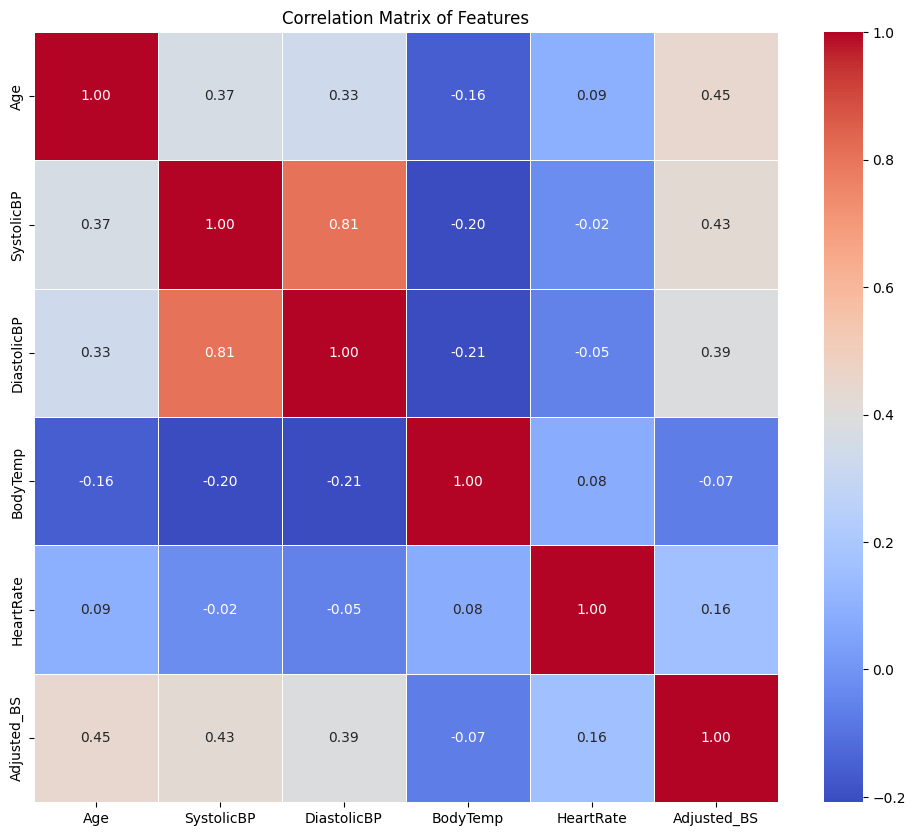

In [ ]:
#Drawing a HeatMap to show the correlation between variables
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

We can see that Age and Blood Sugar (Adjusted_BS) have a medium positive correlation. We can also see that there is a medium positive correlation between Systolic and Diastolic Blood Pressure. There is also a medium positive correlation between both Systolic and Diastolic Blood Pressure and Age.

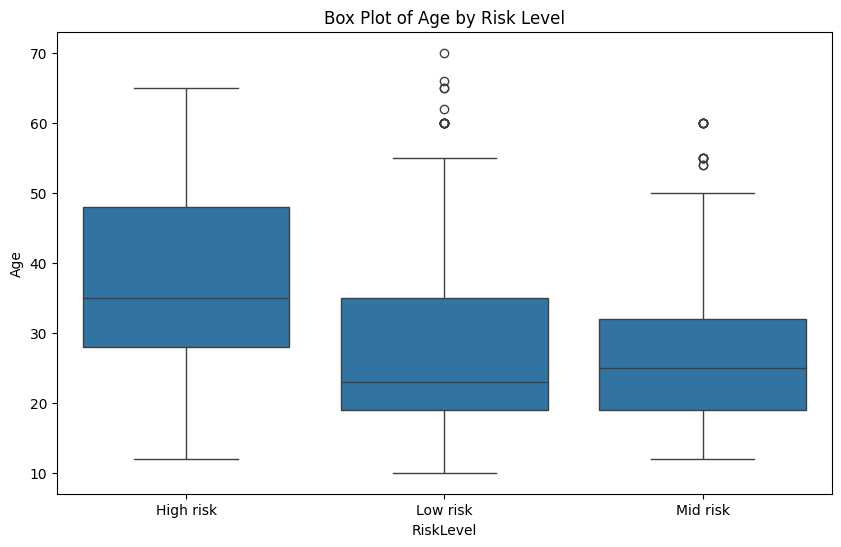

In [ ]:
#Exploring the correlated variables identified by the HeatMap
#Exploring the relationship between Age and RiskLevel
plt.figure(figsize=(10, 6))
sns.boxplot(x='RiskLevel', y='Age', data=df)
plt.title('Box Plot of Age by Risk Level')
plt.show()


The boxplot above shows us that the median for high risk is associated with a higher ages at 35, and that for a low risk pregnancy the optimum age is most likely in the early 20s, with mid risk being associated more with people in their mid 20s.

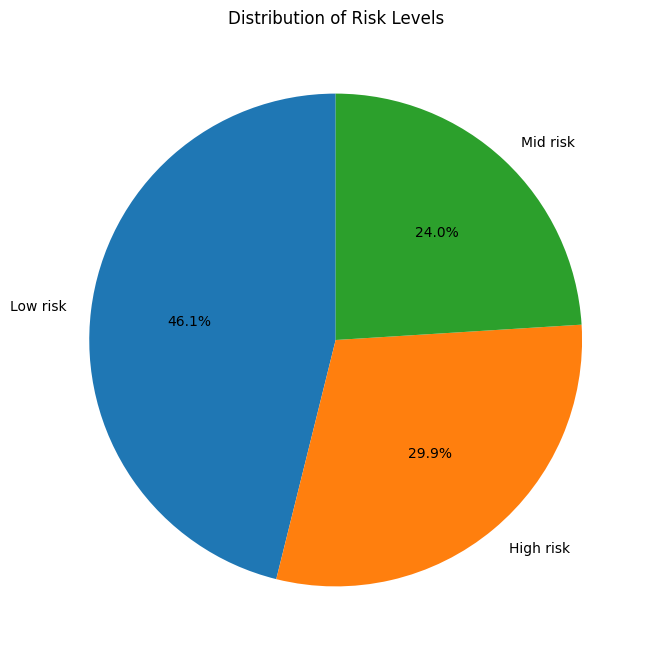

In [ ]:
#A pie chart to show the distribution of the Target variable 'RiskLevel'
risk_level_counts = df['RiskLevel'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(risk_level_counts, labels=risk_level_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Risk Levels')
plt.show()

Here from the pie chart we can see that most pregnancies are deemed low risk, with high risk coming second and mid risk coming third.

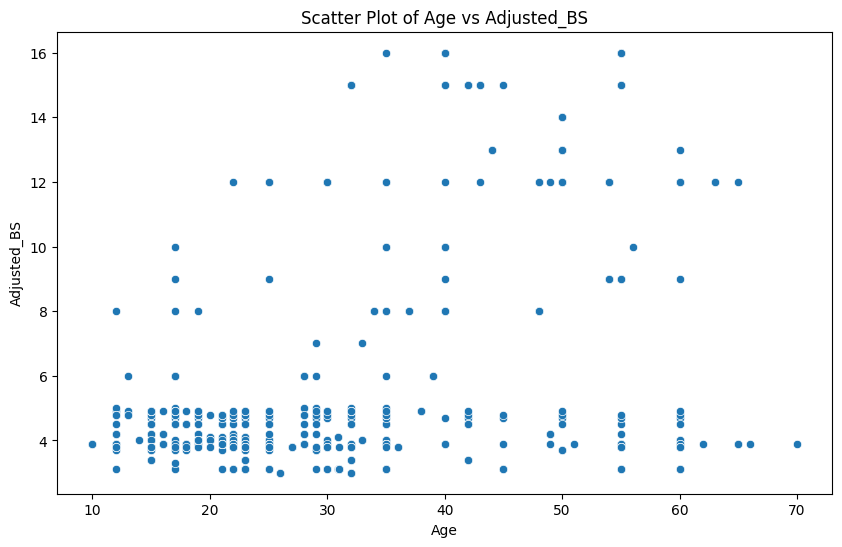

In [ ]:
#Plotting the Age and Blood Sugar as a scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Adjusted_BS', data=df)
plt.title('Scatter Plot of Age vs Adjusted_BS')
plt.xlabel('Age')
plt.ylabel('Adjusted_BS')
plt.show()


Here we can see that theres a positive correlation between Adjusted_BS (Blood Sugar) and increase in maternal ages.

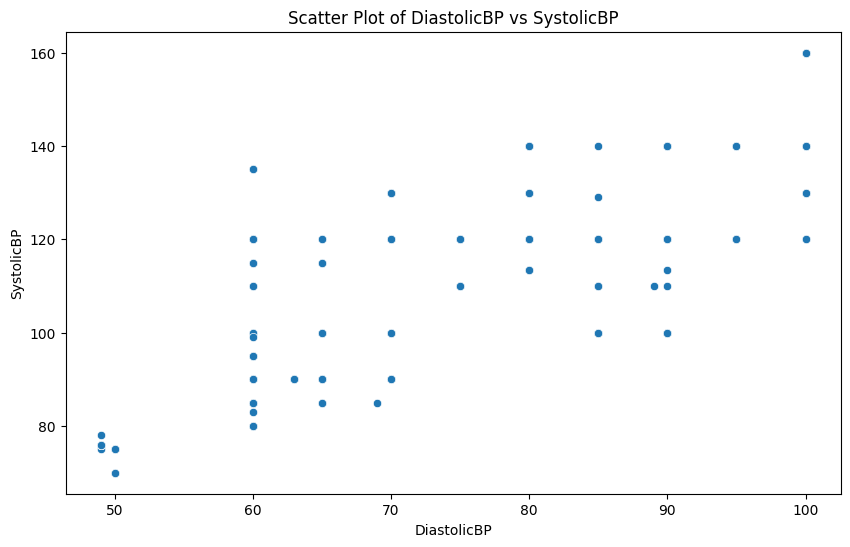

In [ ]:
# Plotting'DiastolicBP' and 'SystolicBP' as a scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DiastolicBP', y='SystolicBP', data=df)
plt.title('Scatter Plot of DiastolicBP vs SystolicBP')
plt.xlabel('DiastolicBP')
plt.ylabel('SystolicBP')
plt.show()


Here we can see that there positive correlation between Systolic BP and Diastolic BP which matches medical consensus that Systolic BP and Diastolic BP frequently display a linear relationship characterised by a slope.

# **Summary and Insights**

**Analysis of Maternal Pregnancy Risk Factors:**

Age and Blood Sugar exhibit a medium positive correlation.
There is a medium positive correlation between Systolic and Diastolic Blood Pressure. Both Systolic and Diastolic Blood Pressure show a medium positive correlation with Age.

The box plot analysis reveals that the median age for high-risk pregnancies is around 35. Low-risk pregnancies tend to be associated with younger ages, possibly in the early 20s. Mid-risk pregnancies show a median age in the mid-20s.


The pie chart illustrates that the majority of pregnancies are categorized as low risk. High-risk pregnancies come second in frequency, while mid-risk pregnancies rank third.

A positive correlation is observed between Blood Sugar and maternal age. This suggests that as maternal age increases, there is a tendency for blood sugar levels to rise.
Blood Pressure Relationships:

A positive correlation is noted between Systolic Blood Pressure and Diastolic Blood Pressure. This aligns with medical consensus, indicating that Systolic and Diastolic Blood Pressure often display a linear relationship characterized by a slope.

Overall, these insights suggest that maternal age plays a significant role in influencing blood sugar levels and blood pressure during pregnancy. The boxplot and pie chart provide additional context about the distribution of pregnancy risk levels across different age groups.